In [ ]:
  import torch
import torch.nn as nn
import pandas as pd


df = pd.DataFrame({'category': [0, 1, 2, 2, 1, 0, 3]})
device = 'cpu'
in_feats = 5

embedding_layer = nn.Embedding(max(df['category'].unique()) + 1, in_feats).to(device)

# Example input (batch of categories)
category_input = torch.tensor([0, 1, 2, 3])  # Shape (4,)

# Get embeddings
output = embedding_layer(category_input)
print(output)
print(output.shape)  # Output shape: (4, 5)


tensor([[-0.2461,  0.7010, -0.3023,  1.3543, -0.5736],
        [-0.2709, -0.2512, -1.4525,  0.4901, -1.3380],
        [ 1.3604, -0.8667, -1.1890, -1.1553,  1.2676],
        [ 0.2583, -0.2287, -1.1195, -0.5806, -0.2680]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 5])


In [ ]:
import kagglehub
import shutil

# Download the dataset
dataset_path = kagglehub.dataset_download("hojjatk/mnist-dataset")

# Define the target directory
target_directory = "/content/"

# Move dataset to sample_data
shutil.move(dataset_path, target_directory)

print("Dataset moved to:", target_directory)


100%|██████████| 22.0M/22.0M [00:00<00:00, 110MB/s]

Extracting files...


Dataset moved to: /content/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
!pip install retina-face

In [ ]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt


In [ ]:
img_path = "/content/DSCF3076.JPG"

In [ ]:
img=cv2.imread(img_path)

In [ ]:
obj = RetinaFace.detect_faces(img_path)

In [ ]:
len(obj.keys())

24

In [ ]:
for key in obj.keys():
  identity=obj[key]
  facial_area= identity["facial_area"]

  cv2.rectangle(img, (facial_area[2],facial_area[3]),(facial_area[0],facial_area[1]), (255,255,255), 1)

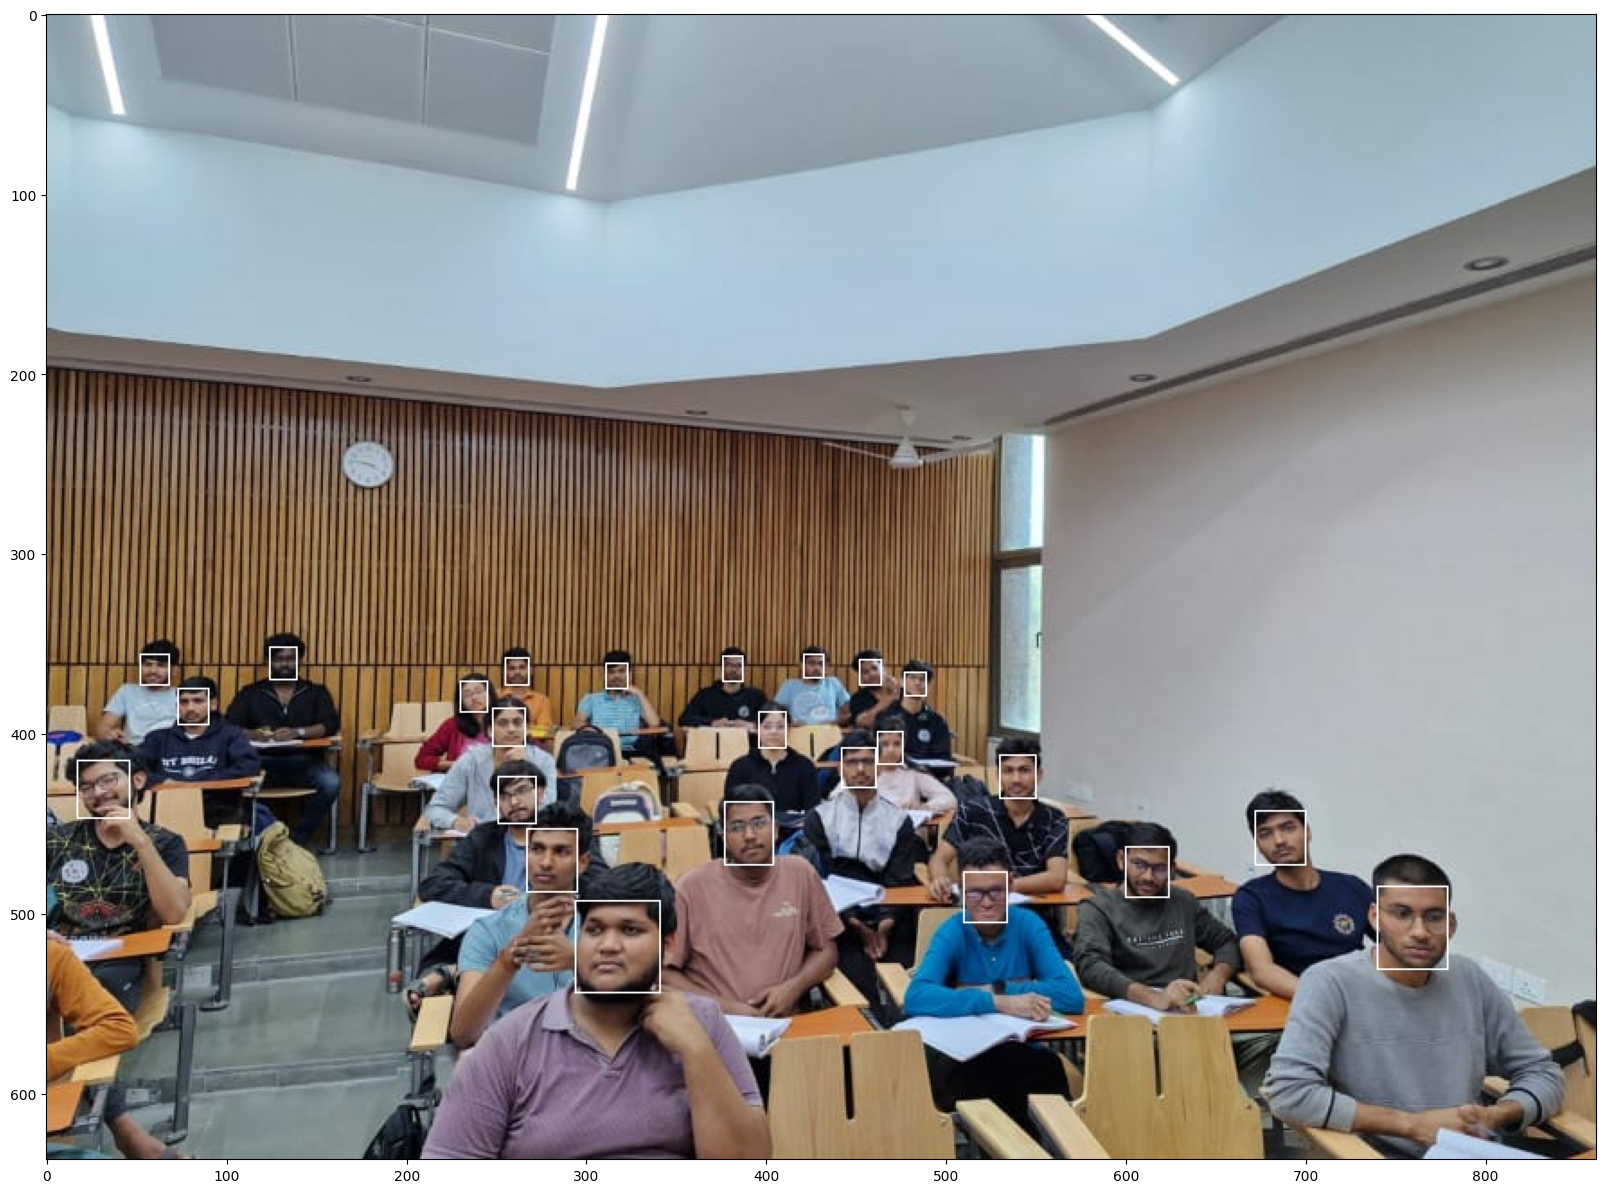

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img[:,: , ::-1])
plt.show()

In [ ]:
!pip install DeepFace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=7f859b8455c5f5b253a3d932dbb1567714975448cac46e65edbaadfd6fa35c30
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


Face face_8 matches with the source image.


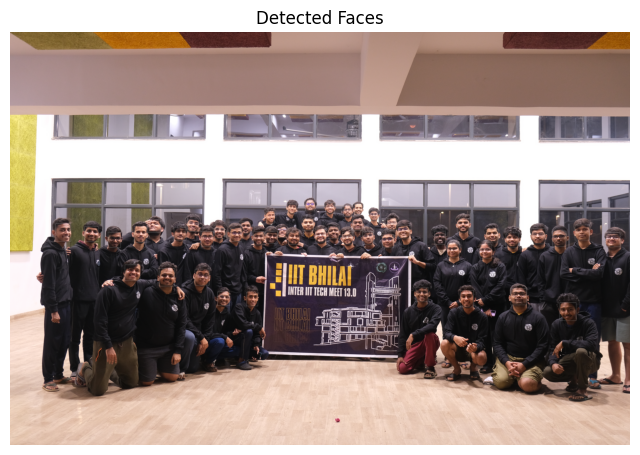

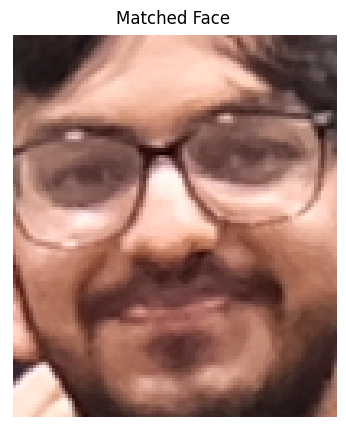

In [ ]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# Load the source image
source_img_path = "source2.jpg"


# List to store matched face images
matched_faces = []

for key in obj.keys():
    identity = obj[key]
    facial_area = identity["facial_area"]

    # Draw rectangle around the detected face
    cv2.rectangle(img, (facial_area[2], facial_area[3]), (facial_area[0], facial_area[1]), (255, 255, 255), 1)

    # Crop the face region from the detected image
    detected_face = img[facial_area[1]:facial_area[3], facial_area[0]:facial_area[2]]

    # Match the detected face with the source image
    try:
        result = DeepFace.verify(detected_face, source_img_path, model_name="Facenet512", enforce_detection=False)

        if result["verified"]:
            print(f"Face {key} matches with the source image.")
            matched_faces.append(detected_face)  # Store matched faces

    except Exception as e:
        print(f"Error processing face {key}: {e}")

# Plot the original image
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Detected Faces")
plt.axis("off")
plt.show()

# Plot all matched faces
if matched_faces:
    fig, axes = plt.subplots(1, len(matched_faces), figsize=(5 * len(matched_faces), 5))

    if len(matched_faces) == 1:
        axes.imshow(cv2.cvtColor(matched_faces[0], cv2.COLOR_BGR2RGB))
        axes.set_title("Matched Face")
        axes.axis("off")
    else:
        for i, face in enumerate(matched_faces):
            axes[i].imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
            axes[i].set_title(f"Matched Face {i+1}")
            axes[i].axis("off")

    plt.show()
else:
    print("No matched faces found.")
